In [277]:
%matplotlib inline
import numpy as np
import json
import math
from random import gauss
import matplotlib.pyplot as pyplot
from matplotlib.finance import candlestick_ohlc
from datetime import date

In [150]:
def bs_model(S, T, v, sigma=1, r=0.02):
    return S * math.exp((r - 0.5 * v**2) * T + v * (T ** 0.5) * gauss(0, sigma))

In [298]:
with open('./txf_201409_201410.raw') as f:
    data_rel = [list(map(int, line.strip().split('\t')[1:])) for line in f.readlines()]

In [307]:
def extract_close(data):
    return np.array(data)[:, -1].astype(float)


def extract_ohcl(data):
    return np.array(data)[:, 2:-1].astype(float)


# cal volatility
def volatility(data: 'Single Date'):
    '''
    >>> volatility(data[-1])
    
    1/4 day
    '''
    d = np.array(data)[:, -1].astype(float)
    return ( ( (d[1:] - d[:-1]) / d[:-1]).std() ) / math.sqrt(1*4 / 252)


def gen_k(data, start_price):
    close = extract_close(data)
    #S = close.mean()
    S = start_price
    T = 1 / 252  # 1 min
    v = volatility(data)

    ret = np.empty((len(data) * 4,))
    for i in range(len(data) * 4):
        S = bs_model(S=S, T=T, v=v, r=0.02)
        ret[i] = round(S)
    return ret

def merge_price(d):
    o = d[0]
    c = d[-1]
    h = d.max()
    l = d.min()
    return np.array([o, h, l, c])

([<matplotlib.lines.Line2D at 0x828193940>,
  <matplotlib.patches.Rectangle at 0x8282c6a58>])

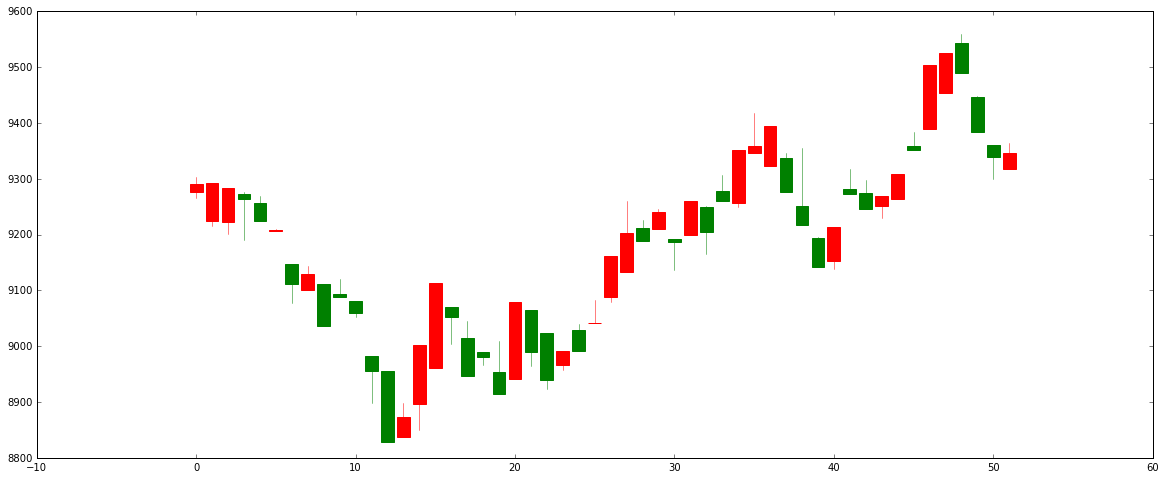

In [366]:
sim_k = gen_k(data_rel, data_rel[0][0])
sim_k = np.array([merge_price(i) for i in sim_k.reshape((sim_k.size // 4, 4))])

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
candlestick_ohlc(ax,
                 np.hstack((np.arange(sim_k.shape[0]).reshape((sim_k.shape[0], 1)), sim_k)), 
                 width=0.8,
                 colorup='r',
                 colordown='green')

In [332]:
np.arange(sim_k.shape[0]).reshape((sim_k.shape[0], 1)).shape

(52, 1)

In [331]:
sim_k.shape

(52, 4)